In [2]:
import cfbd
import matplotlib.pyplot as plt
import pandas as pd
from config import api_key

configuration = cfbd.Configuration()
configuration.api_key['Authorization'] = api_key
configuration.api_key_prefix['Authorization'] = 'Bearer'

api_instance = cfbd.GamesApi(cfbd.ApiClient(configuration))

In [72]:
season = [year for year in range(1970,2021)]

score_df = pd.DataFrame({"Season":season,
                         "Avg Points Scored Per Game": "",
                         "Avg Turnovers": "",
                         "Avg Total Yards": "",
                         "Avg Third Down Eff": ""})

In [134]:
for year in season:
    games = api_instance.get_games(year=year)
    total_points = []
    for game in games:
        total_points.append(int(game.home_points)+int(game.away_points))
    score_df.loc[score_df["Season"] == year, ["Avg Points Scored Per Game"]] = sum(total_points) / len(total_points)

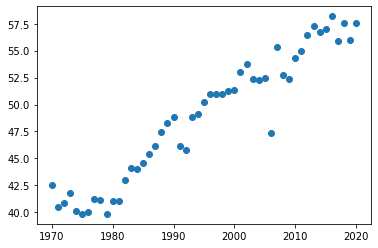

In [138]:
x_axis = score_df["Season"]
y_axis = score_df["Avg Points Scored Per Game"]

plt.scatter(x_axis, y_axis)
plt.show()

In [129]:
for year in season:
    turnovers = []
    total_yards = []
    third_attempts = []
    third_successes = []
    for week in range(1,17):
        try:
            game_teams = api_instance.get_team_game_stats(year=year, week=week)
            for game in game_teams:
                stats_list_1 = game.teams[0]["stats"]
                stats_list_2 = game.teams[1]["stats"]
                for result in stats_list_1:                 
                    if result["category"] == "turnovers":
                        turnover_1 = int(result["stat"])
                    elif result["category"] == "totalYards":
                        tot_yards_1 = int(result["stat"])  
                    elif result["category"] == "thirdDownEff":
                        third_eff_str_1 = result["stat"].split("-") #thirdDownEff
                for result in stats_list_2:                 
                    if result["category"] == "turnovers":
                        turnover_2 = int(result["stat"])
                    elif result["category"] == "totalYards":
                        tot_yards_2 = int(result["stat"])
                    elif result["category"] == "thirdDownEff":
                        third_eff_str_2 = result["stat"].split("-") #thirdDownEff
                
                turnovers.append(turnover_1 + turnover_2)
                total_yards.append(tot_yards_1 + tot_yards_2)
                third_attempts.append(int(third_eff_str_1[1])+int(third_eff_str_2[1]))
                third_successes.append(int(third_eff_str_1[0])+int(third_eff_str_2[0]))
        except Exception as e:
            print(f"No data for season {year} week {week}. Skipping {e}")
    score_df.loc[score_df["Season"] == year, ["Avg Turnovers"]] = sum(turnovers)/len(turnovers)
    score_df.loc[score_df["Season"] == year, ["Avg Total Yards"]] = sum(total_yards)/len(total_yards)
    score_df.loc[score_df["Season"] == year, ["Avg Third Down Eff"]] = sum(third_attempts)/len(third_attempts) #/ (sum(third_successes)/len(third_successes))

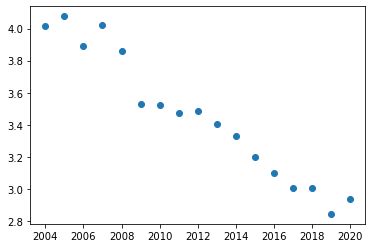

In [131]:
new_score_df = score_df.loc[score_df["Season"] >= 2004, :]

x_axis = new_score_df["Season"]
y_axis = new_score_df["Avg Turnovers"]

plt.scatter(x_axis, y_axis)
plt.show()

In [97]:
configuration = cfbd.Configuration()
configuration.api_key['Authorization'] = 'PfqPJN68aTxvzIQ38XuLY36DRduJuuJJ8EpUQ/w4yJRyncy+Cs4B4u+DgvWZj9xk'
configuration.api_key_prefix['Authorization'] = 'Bearer'

api_instance = cfbd.GamesApi(cfbd.ApiClient(configuration))
game_teams = api_instance.get_team_game_stats(year=2004, week=5)
game_teams

[{'id': 242692426,
  'teams': [{'conference': 'SEC',
             'homeAway': 'away',
             'points': 26,
             'school': 'Vanderbilt',
             'stats': [{'category': 'fumblesRecovered', 'stat': '0'},
                       {'category': 'rushingTDs', 'stat': '1'},
                       {'category': 'puntReturnYards', 'stat': '28'},
                       {'category': 'puntReturnTDs', 'stat': '0'},
                       {'category': 'puntReturns', 'stat': '2'},
                       {'category': 'passingTDs', 'stat': '2'},
                       {'category': 'kickingPoints', 'stat': '6'},
                       {'category': 'firstDowns', 'stat': '19'},
                       {'category': 'thirdDownEff', 'stat': '9-17'},
                       {'category': 'fourthDownEff', 'stat': '2-3'},
                       {'category': 'totalYards', 'stat': '329'},
                       {'category': 'netPassingYards', 'stat': '187'},
                       {'category': 'comple

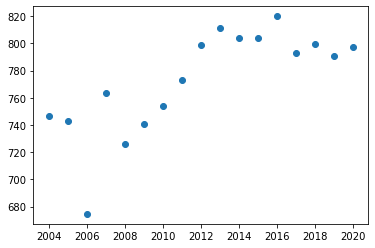

In [132]:
y_axis = new_score_df["Avg Total Yards"]

plt.scatter(x_axis, y_axis)
plt.show()

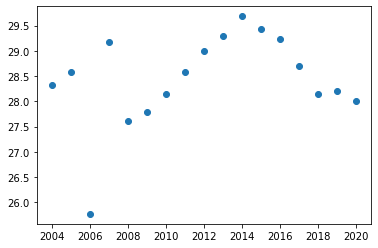

In [133]:
y_axis = new_score_df["Avg Third Down Eff"]

plt.scatter(x_axis, y_axis)
plt.show()

In [ ]:
score_df.to_csv("Output/metrics_by_season.csv", index=False, header=True)